In [3]:
# Can be applied to both regression and classification problems
# Many useful properties
# Very popular
# Basis for more sophisticated models
# Have a different way of "thinking" than the other models we have studied

In [4]:
import pandas as pd
train=pd.read_csv("vehicles_train.csv")


,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [14]:
print train.vtype.value_counts()
train.shape

car      11
truck     3
Name: vtype, dtype: int64


(14, 6)

In [15]:
train['vtype']=train.vtype.map({'car':0,'truck':1})

In [16]:
feature_cols=['year','miles','doors','vtype']
X=train[feature_cols]
y=train.price

In [17]:
from sklearn.tree import DecisionTreeRegressor
treereg=DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [24]:
import numpy as np
from sklearn.cross_validation import cross_val_score
scores=cross_val_score(treereg,X,y,cv=14,scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3107.1428571428573

In [27]:
treereg=DecisionTreeRegressor(max_depth=1,random_state=1)
scores=cross_val_score(treereg,X,y,cv=14,scoring="neg_mean_squared_error")
np.mean(np.sqrt(-scores))

4050.1443001442999

In [28]:
max_depth_range=range(1,8)
RMSE_Scores=[]
for depth in max_depth_range:
    treereg=DecisionTreeRegressor(max_depth=depth,random_state=1)
    scores=cross_val_score(treereg,X,y,cv=14,scoring="neg_mean_squared_error")
    RMSE_Scores.append(np.mean(np.sqrt(-scores)))
    
RMSE_Scores


[4050.1443001442999,
 3345.238095238095,
 3002.3809523809527,
 3125.0,
 3107.1428571428573,
 3107.1428571428573,
 3107.1428571428573]

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

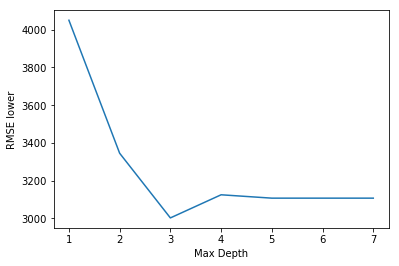

In [30]:
plt.plot(max_depth_range,RMSE_Scores)
plt.xlabel("Max Depth")
plt.ylabel("RMSE lower")

In [31]:
treereg=DecisionTreeRegressor(max_depth=3,random_state=1)
treereg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [32]:
#Gini importance of each column
pd.DataFrame({'feature':feature_cols,'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


In [34]:
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_vehicles.dot', feature_names=feature_cols)


In [35]:
test=pd.read_csv('vehicles_test.csv')
test['vtype']=test.vtype.map({'car':0,'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [36]:
X_test = test[feature_cols]
y_test = test.price
y_pred = treereg.predict(X_test)
y_pred

array([  4000.,   5000.,  13500.])

In [37]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

In [39]:
titanic=titanic=pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
#titanic['Sex']=titanic.Sex.map({'female':1,'male':0})
titanic.Age.isnull().sum()
titanic.Age.fillna(titanic.Age.median(),inplace=True)


In [51]:
titanic.Embarked.value_counts()
embarked_dummies=pd.get_dummies(titanic.Embarked,prefix="embarked")
embarked_dummies.drop(embarked_dummies.columns[0],axis=1,inplace=True)

In [52]:
titanic=pd.concat([titanic,embarked_dummies],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1


In [54]:
feature_cols=['Pclass', 'Sex', 'Age', 'embarked_Q', 'embarked_S']
X=titanic[feature_cols]
y=titanic.Survived

In [55]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')